# Exercícios - Agregação dos Dados 🎒 🎲

É a reta final e a gente está como?

<img src='./img/excited_gif.gif' width='30%'>

Bora em frente que atrás vem gente! 🏃🏻‍♀️ O que vamos fazer nos exercícios do dia de hoje é, principalmente, refatorar os códigos da aula passada, utilizando o `groupby`. Você já conhece os passos iniciais e o conjunto de dados que vamos trabalhar, o de despesas por deputados nos anos de 2021, 2022 e 2023. Importe as bibliotecas necessárias e carregue o arquivo disponível na pasta `data`.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline


In [4]:
arq_deputados_despesas = './data/deputados_despesas.csv'
df_dep_desp = pd.read_csv(arq_deputados_despesas, sep=';', encoding='utf-8')


In [5]:
df_dep_desp.head()


,mes,ano,nome,idLegislaturaInicial,idLegislaturaFinal,ufNascimento,municipioNascimento,txNomeParlamentar,sgPartido,txtDescricao,txtFornecedor,vlrDocumento,vlrGlosa,vlrLiquido,datEmissao
0,5,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,EDVALDO FRANCISCO DE OLIVEIRA,398.28,0.0,398.28,2021-05-04 00:00:00
1,12,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-12-02 00:00:00
2,10,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-10-04 00:00:00
3,11,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-11-01 00:00:00
4,12,2021,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2021-12-30 00:00:00


In [144]:
df_dep_desp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138696 entries, 0 to 138695
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mes                   138696 non-null  int64  
 1   ano                   138696 non-null  int64  
 2   nome                  138696 non-null  object 
 3   idLegislaturaInicial  138696 non-null  int64  
 4   idLegislaturaFinal    138696 non-null  int64  
 5   ufNascimento          138696 non-null  object 
 6   municipioNascimento   138696 non-null  object 
 7   txNomeParlamentar     138696 non-null  object 
 8   sgPartido             138696 non-null  object 
 9   txtDescricao          138696 non-null  object 
 10  txtFornecedor         138696 non-null  object 
 11  vlrDocumento          138696 non-null  float64
 12  vlrGlosa              138696 non-null  float64
 13  vlrLiquido            138696 non-null  float64
 14  datEmissao            138696 non-null  object 
dtype

Antes de trabalharmos com o `groupby`, defina as colunas `ano` e `mes` como índices do nosso `DataFrame`. Para isso, utilize o método `set_index()`.

In [145]:
#Definir as colunas 'ano' e 'mes' como indices.
df_dep_desp.set_index(['ano', 'mes'], inplace=True)


In [146]:
df_dep_desp.head()


nome  idLegislaturaInicial  idLegislaturaFinal  \
ano  mes                                                             
2021 5    Acácio Favacho                    56                  57   
     12   Acácio Favacho                    56                  57   
     10   Acácio Favacho                    56                  57   
     11   Acácio Favacho                    56                  57   
     12   Acácio Favacho                    56                  57   

         ufNascimento municipioNascimento txNomeParlamentar sgPartido  \
ano  mes                                                                
2021 5             AP              Macapá    Acácio Favacho       MDB   
     12            AP              Macapá    Acácio Favacho       MDB   
     10            AP              Macapá    Acácio Favacho       MDB   
     11            AP              Macapá    Acácio Favacho       MDB   
     12            AP              Macapá    Acácio Favacho       MDB   

                                               txtDescricao  \
ano  mes                                                      
2021 5    MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   
     12   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   
     10   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   
     11   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   
     12   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   

                          txtFornecedor  vlrDocumento  vlrGlosa  vlrLiquido  \
ano  mes                                                                      
2021 5    EDVALDO FRANCISCO DE OLIVEIRA        398.28       0.0      398.28   
     12               NELY PRADO MASUKO       5000.00       0.0     5000.00   
     10               NELY PRADO MASUKO       5000.00       0.0     5000.00   
     11               NELY PRADO MASUKO       5000.00       0.0     5000.00   
     12               NELY PRADO MASUKO       5000.00       0.0     5000.00   

                   datEmissao  
ano  mes                       
2021 5    2021-05-04 00:00:00  
     12   2021-12-02 00:00:00  
     10   2021-10-04 00:00:00  
     11   2021-11-01 00:00:00  
     12   2021-12-30 00:00:00

## Deputados e partidos mais gastadores em 2023 🤑

Plote gráficos que respondam às seguintes perguntas, utilizando o *DataFrame* criado:
1. Quais os 10 deputados que mais gastaram com cotas parlamentares em 2023? Use um gráfico de barras para mostrar o resultado.
2. Quais os 10 partidos que mais gastaram com cotas parlamentares em 2023? Use um gráfico de barras para mostrar o resultado.

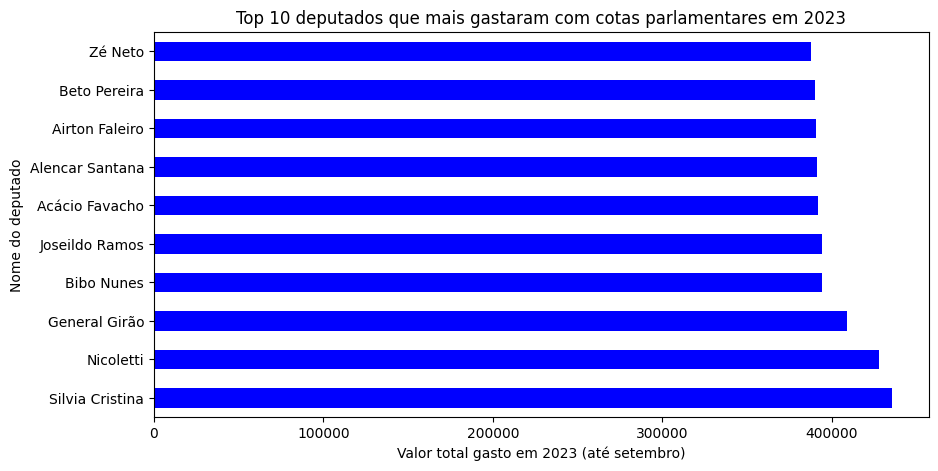

In [147]:
#Vamos plotar em UMA LINHA quais os 10 deputados que mais gastaram com cotas
#parlamentares em 2023.
fig = plt.figure(figsize=(15,7)) #criar uma figura
plt.title('Top 10 deputados que mais gastaram com cotas parlamentares em 2023')
df_dep_desp.loc[2023].groupby('nome')['vlrLiquido'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 5), color='blue')
plt.xlabel('Valor total gasto em 2023 (até setembro)')
plt.ylabel('Nome do deputado')
plt.show()


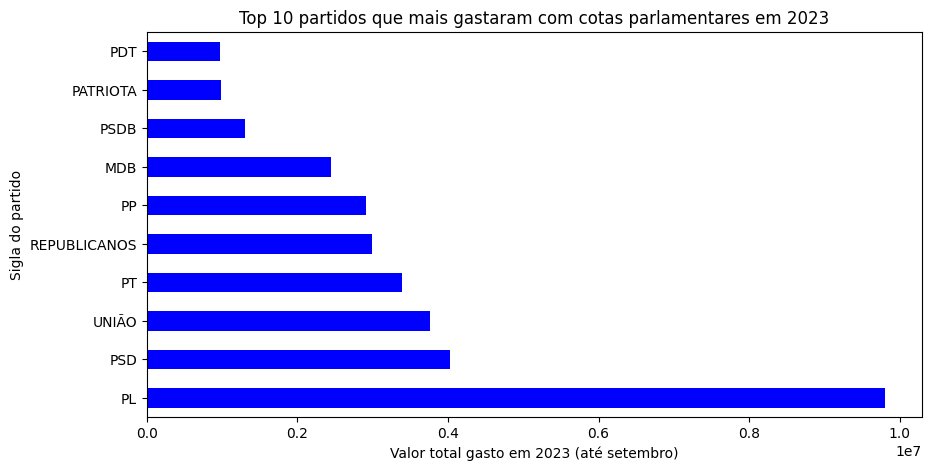

In [148]:
#Vamos plotar em UMA LINHA quais os 10 partidos que mais gastaram com cotas
#parlamentares em 2023.
fig = plt.figure(figsize=(15,7)) #criar uma figura
plt.title('Top 10 partidos que mais gastaram com cotas parlamentares em 2023')
df_dep_desp.loc[2023].groupby('sgPartido')['vlrLiquido'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 5), color='blue')
plt.xlabel('Valor total gasto em 2023 (até setembro)')
plt.ylabel('Sigla do partido')
plt.show()


## Com o quê mais gastaram os deputados mais gastadores? 🤔
Agora vamos investigar quanto gastaram os deputados mais gastadores com as top 5 despesas mais comuns em 2023. Para isso, descubra quais são as 5 despesas mais realizadas pelos deputados e crie um novo *DataFrame* contendo os valores gastos por cada um dos 10 deputados mais gastadores em cada uma dessas despesas. Utilize um grafico de barras empilhadas para mostrar o resultado e o comando `groupby` para refatorar o código da aula passada.

In [150]:
#Pega a lista dos nomes dos deputados mais gastadores e das 5 despesas mais comuns em 2023.
lista_dep_mais_gastadores = df_dep_desp.loc[2023].groupby('nome')['vlrLiquido'].sum().sort_values(ascending=False).head(10).index.tolist()

lista_desp_mais_comuns = df_dep_desp.loc[2023]['txtDescricao'].value_counts().head(5).index.tolist()


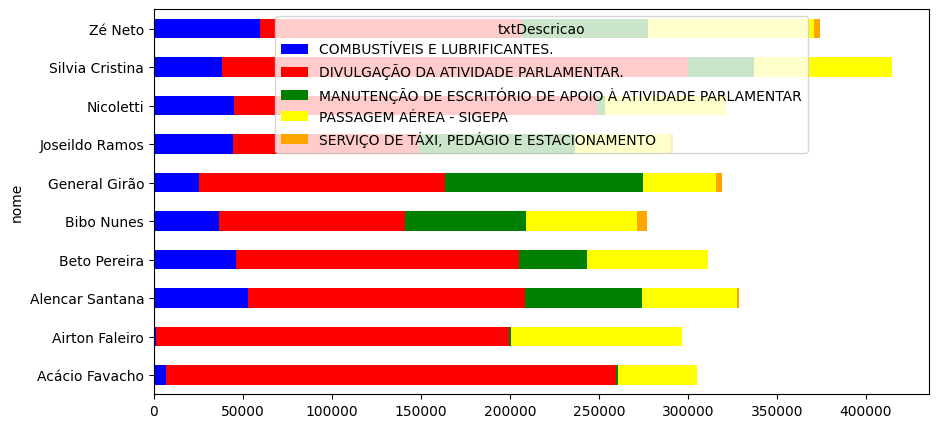

In [151]:
df_dep_desp_2023 = df_dep_desp.loc[2023].reset_index()
df_dep_desp_2023.set_index(['nome'], inplace=True)
df_dep_desp_2023[df_dep_desp_2023['txtDescricao'].isin(lista_desp_mais_comuns)].loc[lista_dep_mais_gastadores].groupby(['nome', 'txtDescricao'])['vlrLiquido'].sum().unstack().plot(kind='barh', stacked=True, figsize=(10, 5), color=['blue', 'red', 'green', 'yellow', 'orange'])
plt.show()


## 🌶️🌶️ Desafio: Evolução dos gastos do(a) deputado(a) mais gastador(a) 📈
Quem foi o deputado(a) mais gastador(a) de 2023? Plote um gráfico de linha que mostre a evolução dos gastos dele(a) ao longo dos meses dos anos de 2021, 2022 e 2023.

In [152]:
#get the name of the deputy who spent the most in df_dep_desp
nome = df_dep_desp.loc[2023].groupby('nome')['vlrLiquido'].sum().sort_values(ascending=False).head(1).index.tolist()[0]
nome


'Silvia Cristina'

In [153]:
df_dep_desp.reset_index(inplace=True)
df_dep_desp.set_index(['nome','ano','mes'],inplace=True)


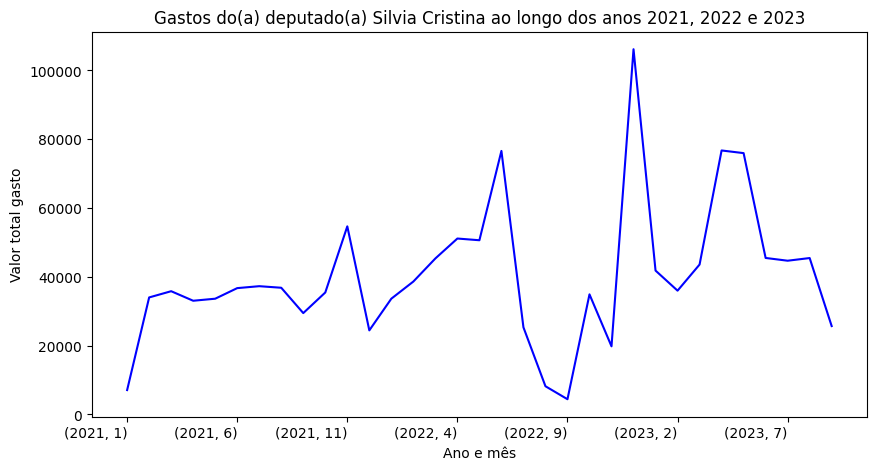

In [154]:
#criar um gráfico de linha com os dados de df_dict_dep_mais_gastou_ano_mes
plt.figure(figsize=(20,10))
#rotaciona os labels do eixo x em 30 graus no plt
plt.xticks(rotation=30, horizontalalignment='right')
#set the title and the labels
plt.title(f'Gastos do(a) deputado(a) {nome} ao longo dos anos 2021, 2022 e 2023')
df_dep_desp.loc[nome].groupby(['ano','mes'])['vlrLiquido'].sum().plot(kind='line', figsize=(10, 5), color='blue')
plt.xlabel('Ano e mês')
plt.ylabel('Valor total gasto')
plt.show()


Vamos adicionar mais informações ao gráfico? Que tal incluir uma linha horizontal que mostre a média de gastos do deputado(a) mais gastador(a) durante o período estudado? Para isso, utilize o método `axhline()` do `matplotlib.pyplot`.

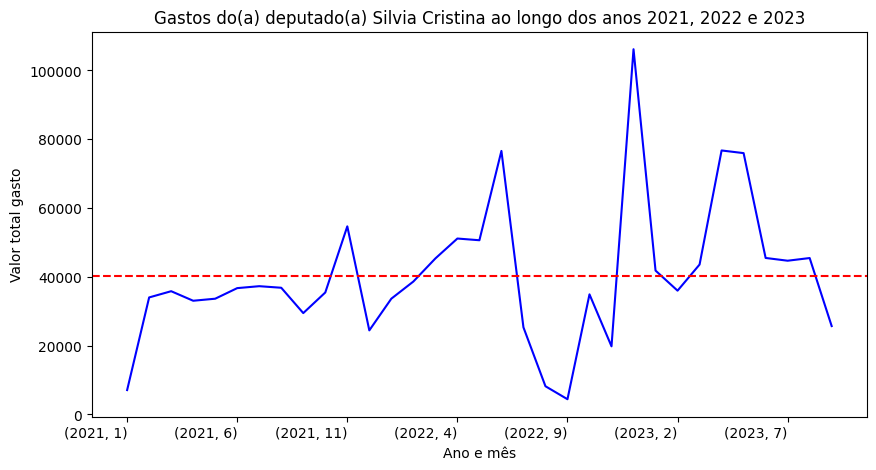

In [155]:
#criar um gráfico de linha com os dados de df_dict_dep_mais_gastou_ano_mes
plt.figure(figsize=(20,10))
#rotaciona os labels do eixo x em 30 graus no plt
plt.xticks(rotation=30, horizontalalignment='right')
#Adiciona o título contendo o nome do(a) deputado(a)
plt.title(f'Gastos do(a) deputado(a) {nome} ao longo dos anos 2021, 2022 e 2023')
df_dep_desp.loc[nome].groupby(['ano','mes'])['vlrLiquido'].sum().plot(kind='line', figsize=(10, 5), color='blue')
#adiciona a linha horizontal com o valor médio gasto pelo(a) deputado(a)
plt.axhline(y=df_dep_desp.loc[nome].groupby(['ano','mes'])['vlrLiquido'].sum().mean(), color='r', linestyle='--')
#adiciona os labels dos eixos x e y no gráfico
plt.xlabel('Ano e mês')
plt.ylabel('Valor total gasto')
plt.show()


Agora, adicione ao gráfico a evolução das despesas dos outros 9 deputados mais gastadores. Para isso, utilize um laço de repetição e o método `plot()` do `matplotlib.pyplot`.

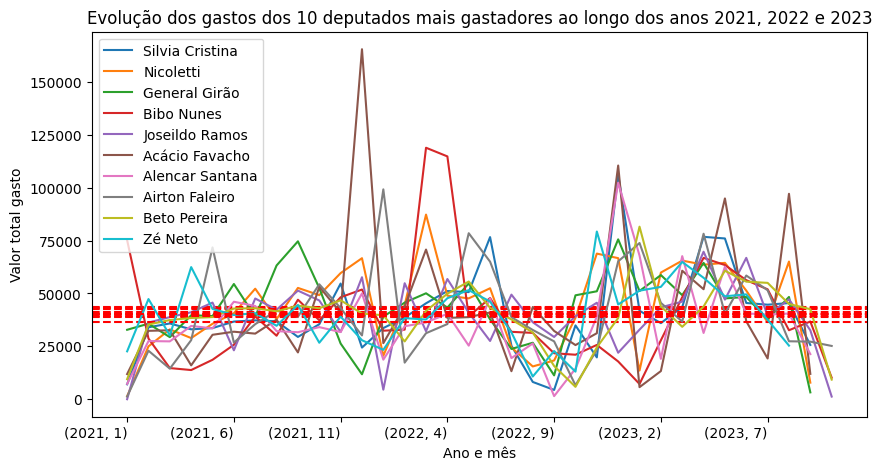

In [157]:
#criar um gráfico de linha com os dados de df_dict_dep_mais_gastou_ano_mes
plt.figure(figsize=(20,10))
#rotaciona os labels do eixo x em 30 graus no plt
plt.xticks(rotation=30, horizontalalignment='right')
#Adiciona o título ao gráfico.
plt.title(f'Evolução dos gastos dos 10 deputados mais gastadores ao longo dos anos 2021, 2022 e 2023')
for dep in lista_dep_mais_gastadores:
    df_dep_desp.loc[dep].groupby(['ano','mes'])['vlrLiquido'].sum().plot(kind='line', figsize=(10, 5), label=dep)
    plt.axhline(y=df_dep_desp.loc[dep].groupby(['ano','mes'])['vlrLiquido'].sum().mean(), color='r', linestyle='--')
#Adiciona a legenda e os labels ao gráfico.
plt.legend()
plt.xlabel('Ano e mês')
plt.ylabel('Valor total gasto')
plt.show()


## Que outras visualizações você consegue criar para analisar os dados? 🤔 Que insights iniciais você consegue tirar dos gráficos acima? 🤓

In [8]:
#Filtrar pelo ano de 2022 (ano de eleicoes)
df_dep_desp_2022 = df_dep_desp[df_dep_desp['ano'] == 2022]
df_dep_desp_2022.head()


,mes,ano,nome,idLegislaturaInicial,idLegislaturaFinal,ufNascimento,municipioNascimento,txNomeParlamentar,sgPartido,txtDescricao,txtFornecedor,vlrDocumento,vlrGlosa,vlrLiquido,datEmissao
145,1,2022,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,232.86,0.0,232.86,2022-01-17 00:00:00
146,1,2022,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,CELULAR FUNCIONAL,349.29,0.0,349.29,2022-01-17 00:00:00
158,1,2022,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,TELEFONIA,LINHA DIRETA,116.43,0.0,116.43,2022-01-17 00:00:00
348,8,2022,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,COMPANHIA ELÉTRICA AMAPÁ,725.38,0.0,725.38,2022-08-23 00:00:00
349,5,2022,Acácio Favacho,56,57,AP,Macapá,Acácio Favacho,MDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NELY PRADO MASUKO,5000.00,0.0,5000.00,2022-05-30 00:00:00


In [14]:
desp_agg = df_dep_desp_2022.groupby('nome').agg(despesas_totais = ('vlrLiquido','sum')).reset_index()


In [15]:
df_dep_2022 = df_dep_desp_2022[['nome', 'ufNascimento']].drop_duplicates()


In [18]:
df_dep_desp_agg = pd.merge(df_dep_2022, desp_agg, on='nome', how='left')


In [17]:
estados_dummies = pd.get_dummies(df_deputies_details['state'], drop_first=True)
df_deputies_details = pd.concat([df_deputies_details, state_dummies], axis=1)


,nome,ufNascimento,despesas_totais
0,Acácio Favacho,AP,515742.86
1,Adolfo Viana,BA,404876.46
2,Adriana Ventura,SP,55900.94
3,Adriano do Baldy,GO,372896.82
4,Airton Faleiro,RS,495362.18
...,...,...,...
129,Talíria Petrone,RJ,352906.97
130,Túlio Gadêlha,PE,472349.96
131,Vermelho,PR,469674.14
132,Zé Neto,BA,447133.83
